# Kelompok 8
1. Indra Deva Aji Zakaria (1301190320)
2. Rahmatia Primadiati (1301194091)
3. Zakia Syahrini (1301194108)

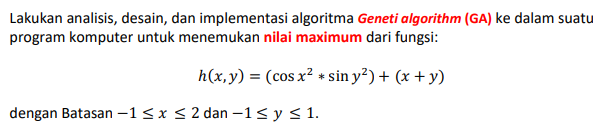

In [ ]:
#import library
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameter

In [ ]:
#param
prob_crossover = 0.7
prob_mutation = 0.01

In [ ]:
#fungsi menentukan jumlah kromosom
def jum_kromosom(nilai):
  temp = int(0)
  for i in range(1, nilai + 1):
    temp += pow(2, -1 * i)
  return temp

#fungsi untuk konversi biner ke string
def konversi_string(biner):
  string = ''
  for sem in biner:
    string += sem
  return string

#buat fungsi untuk generate float ke biner
def genotype(x, min, maks):
  biner = str('')
  desimal = ((x - (min)) * jum_kromosom(5)) / (maks - min)

  biner = []
  i = 1
  while len(biner) != 5:
    if desimal - pow(2, -1 * i) > 0:
      desimal -= pow(2, -1 * i)
      biner.append('1')
    else:
      biner.append('0')
    i += 1
  return konversi_string(biner)

#fungsi untuk konversi ke desimal
def konversi_desimal(nom, maks, min):
  return min + ((maks - min)/jum_kromosom(5)) * (int(nom[0]) * pow(2, -1) + int(nom[1]) * pow(2, -2) + int(nom[2]) * pow(2, -3) + int(nom[3]) * pow(2, -4) + int(nom[4]) * pow(2, -5))

# Generasi Kromosom

In [ ]:
#fungsi untutk menggenerasi kromosom x dan y
kromosom_x = [] #deklarasi array = kosong
for u in range(20):
  random_x = round(np.random.uniform(-1, 2), 3) #random kromosom x dengan range 20 dgn tipe float, 3 angka dibelakang koma
  kromosom_x.append(random_x) #menambahkan hasil dari random ke array kromosom x

In [ ]:
kromosom_x

[0.773,
 -0.156,
 -0.906,
 1.752,
 1.893,
 1.413,
 -0.928,
 1.08,
 1.798,
 -0.115,
 -0.838,
 0.649,
 -0.518,
 1.163,
 1.73,
 -0.671,
 1.311,
 0.328,
 1.307,
 0.008]

In [ ]:
#ubah kromosom x nya ke biner
kromosomX_ke_biner = []
for i in kromosom_x:
  kromosomX_ke_biner.append(genotype(i, -1, 2))
kromosomX_ke_biner

['10010',
 '01000',
 '00000',
 '11100',
 '11101',
 '11000',
 '00000',
 '10101',
 '11100',
 '01001',
 '00001',
 '10001',
 '00100',
 '10110',
 '11100',
 '00011',
 '10111',
 '01101',
 '10111',
 '01010']

In [ ]:
#keluarkan data lengkapnya kromosom x dan nilai binernya
tabel_kromosom_x = {
    "kromosom x" : kromosom_x,
    "nilai biner" : kromosomX_ke_biner
}
pd.DataFrame(tabel_kromosom_x)

,kromosom x,nilai biner
0,0.773,10010
1,-0.156,01000
2,-0.906,00000
3,1.752,11100
4,1.893,11101
5,1.413,11000
6,-0.928,00000
7,1.080,10101
8,1.798,11100
9,-0.115,01001


In [ ]:
#fungsi untutk menggenerasi kromosom x dan y
kromosom_y = [] #deklarasi array = 0
for i in range(20):
  random_y = round(np.random.uniform(-1, 1), 3)
  kromosom_y.append(random_y)

In [ ]:
kromosom_y

[0.424,
 -0.232,
 -0.975,
 0.66,
 0.244,
 -0.658,
 -0.431,
 0.507,
 -0.083,
 0.959,
 -0.638,
 0.995,
 0.879,
 -0.953,
 0.899,
 -0.18,
 -0.803,
 0.794,
 -0.36,
 0.518]

In [ ]:
#ubah kromosom y nya ke biner
kromosomY_ke_biner = []
for i in kromosom_y:
  kromosomY_ke_biner.append(genotype(i, -1, 1))
kromosomY_ke_biner

['10110',
 '01011',
 '00000',
 '11001',
 '10011',
 '00101',
 '01000',
 '10111',
 '01110',
 '11110',
 '00101',
 '11110',
 '11101',
 '00000',
 '11101',
 '01100',
 '00011',
 '11011',
 '01001',
 '10111']

In [ ]:
#keluarkan data lengkapnya kromosom y dan nilai lengkapnya
tabel_kromosom_y = {
    "kromosom y" : kromosom_y,
    "nilai biner" : kromosomY_ke_biner
}
pd.DataFrame(tabel_kromosom_y)

,kromosom y,nilai biner
0,0.424,10110
1,-0.232,01011
2,-0.975,00000
3,0.660,11001
4,0.244,10011
5,-0.658,00101
6,-0.431,01000
7,0.507,10111
8,-0.083,01110
9,0.959,11110


# Menghitung Fitness

In [ ]:
#Fungsi fitness dari suatu kromosom adalah nilai kecocokan kromosom terhadap permasalahan.
def fungsi_fitness(x, y):
  return float(math.cos(math.radians(pow(x, 2))) * math.sin(math.radians(pow(y, 2))) + x + y)

In [ ]:
fitness = []
for i in range(0, len(kromosom_x) and len(kromosom_y)):
  fitness.append(fungsi_fitness(kromosom_x[i], kromosom_y[i]))
#eliminasi fitness
for i in range(len(fitness)):
  #jika ada nilai fitness yang kurang dari 0 maka semua akan diubah menjadi 0
  #Semakin tinggi nilai fitness, seharusnya solusi tersebut semakin optimal.
  if fitness[i] <= 0:
    fitness[i] = 0
fitness

[1.2001375073408627,
 0,
 0,
 2.4195916736556793,
 2.13803706741607,
 0.7625519879421091,
 0,
 1.5914854067382262,
 1.7151200443936203,
 0.8600507718243887,
 0,
 1.6612778692184582,
 0.3744845728090531,
 0.2258461571529392,
 2.6430860612412155,
 0,
 0.5192487396039703,
 1.1330029425016526,
 0.9492609395251824,
 0.5306831201438853]

In [ ]:
#keluarkan data tabel fitness, kromosom x, dan y
tabel_fitness = {
    "kromosom x" : kromosom_x,
    "kromosom y" : kromosom_y,
    "nilai fitness" : fitness,
}
pd.DataFrame(tabel_fitness)

,kromosom x,kromosom y,nilai fitness
0,0.773,0.424,1.200138
1,-0.156,-0.232,0.000000
2,-0.906,-0.975,0.000000
3,1.752,0.660,2.419592
4,1.893,0.244,2.138037
5,1.413,-0.658,0.762552
6,-0.928,-0.431,0.000000
7,1.080,0.507,1.591485
8,1.798,-0.083,1.715120
9,-0.115,0.959,0.860051


In [ ]:
jum_fitness = sum(fitness)
ar = []
for i in fitness:
  ar.append(i/jum_fitness)
data_sementara = {
    "kromosom x" : kromosom_x,
    "kromosom y" : kromosom_y,
    "fitness" : fitness,
    "ar" : ar
}
pd.DataFrame(data_sementara)

,kromosom x,kromosom y,fitness,ar
0,0.773,0.424,1.200138,0.064097
1,-0.156,-0.232,0.000000,0.000000
2,-0.906,-0.975,0.000000,0.000000
3,1.752,0.660,2.419592,0.129225
4,1.893,0.244,2.138037,0.114188
5,1.413,-0.658,0.762552,0.040726
6,-0.928,-0.431,0.000000,0.000000
7,1.080,0.507,1.591485,0.084998
8,1.798,-0.083,1.715120,0.091601
9,-0.115,0.959,0.860051,0.045933


In [ ]:
del(data_sementara)

In [ ]:
#jumlahkan semua fitness dr array ke 0 hingga ke 19
jum_fitness

18.723864861507305

# Pemilihan Orang Tua

In [ ]:
#dari fitness yang didapat kita coba untuk mencari 2 pasang kromosom dengan nilai terkecil lalu lakukan crossover
def fungsi_roulette_wheel(fitness):
  p = 0
  a = random.uniform(0,1)
  while a > 0:
    a -= ar[p]
    p += 1
  return p - 1

# Mutation

In [ ]:
#mengganti suatu gen dengan gen yang baru.
def mutation(biner):
  biner = list(biner)
  for i in range(len(biner)):
    if random.random() <= prob_mutation:
      if biner[i] == '0':
        biner[i] = '1'
  biner = konversi_string(biner)

  return biner

# Crossover

In [ ]:
#pertukaran dengan menggunakan method double crossover
def crossover(biner_ke_1, biner_ke_2):
  #membagi parent kedalam 2 titik potong
  p1, p2 = 4, 6

  sem = biner_ke_1[p1 - 1 : p2 + 1]
  biner_ke_1[p1 - 1 : p2 + 1] = biner_ke_2[p1 - 1 : p2 + 1]
  biner_ke_2[p1 - 1 : p2 + 1] = sem

# Generalisasi

In [ ]:
tabel_fitness = {
    "kromosom x" : kromosom_x,
    "kromosom y" : kromosom_y,
    "nilai fitness" : fitness,
}
print(pd.DataFrame(tabel_fitness))

best_per_gen = []
n = 100

for j in range(n):
  a = fungsi_roulette_wheel(fitness)
  b = fungsi_roulette_wheel(fitness)
  while a == b:
    b = fungsi_roulette_wheel(fitness)

  #deklarasi parent dari kromosom
  pr1 = kromosomX_ke_biner[a] + kromosomY_ke_biner[a]
  pr2 = kromosomX_ke_biner[b] + kromosomY_ke_biner[b]

  #ubah parent ke list lalu lakukan pertukaran
  pr1, pr2 = list(pr1), list(pr2)
  crossover(pr1, pr2)

  #konversi parent ke string
  pr1 = konversi_string(pr1)
  pr2 = konversi_string(pr2)

  if random.random() < prob_crossover:
    if random.randint(0, 20) == 1:
      if random.randint(0, 2) % 2 == 1:
        pr1 = mutation(pr1)
      else:
        pr2 = mutation(pr2)

  #devide chromosom
  kromosom_x1, kromosom_y1 = pr1[:5], pr1[5:10]
  kromosom_x2, kromosom_y2 = pr1[:5], pr2[5:10]

  desimal_1, desimal_2 = konversi_desimal(kromosom_x1, 2, -1), konversi_desimal(kromosom_y1, 1, -1)
  desimal_3, desimal_4 = konversi_desimal(kromosom_x2, 2, -1), konversi_desimal(kromosom_y2, 1, -1)

  fitness_1 = fungsi_fitness(desimal_1, desimal_2)
  fitness_2 = fungsi_fitness(desimal_3, desimal_4)

  #seleksi survivor
  #Proses ini bertujuan untuk memilih N kromosom dari gabungan antara populasi sebelumnya dan offspring yang dihasilkan.
  for i in range(2):
      not_survive = fitness.index(min(fitness))
      if i == 0:
        if fitness_1 > fitness[not_survive]:
          kromosomX_ke_biner[not_survive] = kromosom_x1
          kromosomY_ke_biner[not_survive] = kromosom_y2
          kromosom_x[not_survive] = desimal_3
          kromosom_y[not_survive] = desimal_4
          fitness[not_survive] = fitness_2
  
  best_per_gen.append(max(fitness))
  print(f"best fitness generation-{j} : {best_per_gen[j]}\n\n")
  print(pd.DataFrame(tabel_fitness), end='\n\n')

    kromosom x  kromosom y  nilai fitness
0        0.773       0.424       1.200138
1       -0.156      -0.232       0.000000
2       -0.906      -0.975       0.000000
3        1.752       0.660       2.419592
4        1.893       0.244       2.138037
5        1.413      -0.658       0.762552
6       -0.928      -0.431       0.000000
7        1.080       0.507       1.591485
8        1.798      -0.083       1.715120
9       -0.115       0.959       0.860051
10      -0.838      -0.638       0.000000
11       0.649       0.995       1.661278
12      -0.518       0.879       0.374485
13       1.163      -0.953       0.225846
14       1.730       0.899       2.643086
15      -0.671      -0.180       0.000000
16       1.311      -0.803       0.519249
17       0.328       0.794       1.133003
18       1.307      -0.360       0.949261
19       0.008       0.518       0.530683
best fitness generation-0 : 2.6430860612412155


    kromosom x  kromosom y  nilai fitness
0     0.773000    0.424000 

In [ ]:
best = fitness.index(max(fitness))
kromosom_x[best], kromosom_y[best], fitness[best]

(2.0, 1.0, 3.017409893252357)

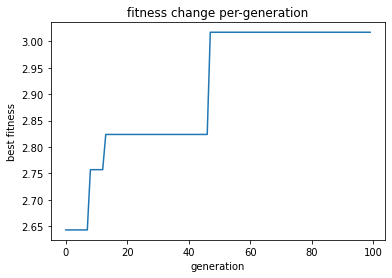

In [ ]:
plt.plot(range(0, n), best_per_gen)
plt.title("fitness change per-generation")
plt.xlabel("generation")
plt.ylabel("best fitness")
plt.show()